In [3]:
import os
import sys
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
## function for plot
## para: 'MODIS'or 'CGLS'
## directory: location for storing csv file, like "D:\\vegetation\\gee\\notebook"
## dominantEZ: 'boreal','tropical','temperate'
## countthres: 0.9
## waterfrac: 0.1, etc.

#def calStas(para, inputdir, dominantLC, dominantEZ, countthres):
def calStas(biopara, sensor, inputdir, dominantEZ, waterfrac, countthres):

    #############read csv file into list of dataframe
    if sensor=='MODIS':
        scale=10.0
    elif sensor=='CGLS':        
        scale=30.0
    else:
        print ('Choose a parameter')
        
    parameter=sensor+".csv"
    df_list=[]
    for filename in os.listdir(inputdir):
        if filename.find(parameter)!=-1: 
            #print(filename)       
            df=pd.read_csv (filename, index_col=0)
            df_list.append(df)
    print ('The number of csv files:',len(df_list))
    #################### create a new dataframe based on condtions applied####

#     if dominantLC=='needle forest':
#         lc = [1.0, 2.0]    
#     elif dominantLC== 'broadleaf forest':
#         lc = [3.0, 4.0, 5.0]
#     elif dominantLC== 'mixed forest':
#         lc = [6.0]
#     else: 
#         print ('please choose a forest type: needle forest, broadleaf forest, mixed forest')
#         return
    if dominantEZ=='boreal':
        lc = [41.0]    
    elif dominantEZ== 'tropical':
        lc = [11.0, 12.0, 13.0, 21.0, 22.0]
    elif dominantEZ== 'temperate':
        lc = [31.0,32.0]
    else: 
        print ('please choose a EZ type: boreal, tropical, temperate')
        return

    newdf_list=[]
    for i in range (0, len(df_list)):    
        mask=df_list[i]['S2'+sensor+'_EZ'].isin(lc) & (df_list[i]['S2'+sensor+'_WaterFraction']<waterfrac) & (df_list[i]['S2'+sensor+'_'+biopara+'COUNT'] >5625*countthres)
        tempdf=df_list[i].loc[mask]
        newdf_list.append(tempdf)
   # print (len(newdf_list))
    ## generate a new df from different tiles
    newdf=pd.concat(newdf_list)
    newdf['S2'+biopara]=newdf['S2'+sensor+'_'+biopara]/500  ### change to 500
    newdf[sensor+biopara]=newdf[sensor+'_'+biopara]/scale
   
    ### sampling points 
    if len(newdf)>50000:
        newdfs=newdf.sample(n = 50000)
    elif len(newdf)==0:
        print ('no sampling points')
        return
    else:
        newdfs=newdf
    print ('Sample points for plotting:',len(newdfs))
    ##########################plot#################    
  
   ### convert one column to numpy array
    x=newdfs[sensor+biopara].to_numpy()
    y=newdfs['S2'+biopara].to_numpy()
     ######Computes the Theil-Sen estimator for a set of points (x, y)###
    res=stats.theilslopes(x,y,0.90 )
    print ('Theil-Sen estimator:', res)
    ##Calculate a linear least-squares regression for two sets of measurements.
    lsq_res=stats.linregress(x,y)
#     res=stats.theilslopes(newdf[sensor+'LAI'],newdf['S2LAI'],0.90 )
#     lsq_res=stats.linregress(newdf[sensor+'LAI'],newdf['S2LAI'])
#     plt.hist2d(x,y, bins=100)   
#     plt.title('LAI 2D histogram')
#     #plt.plot(x, res[1]+res[0]*x,'w--') ## plot for Theil-Sen estimator
#     plt.plot(x, res[1]+res[0]*x,'--',  dashes=(1, 10), color='Red') ## plot for Theil-Sen estimator
#     plt.plot(x, lsq_res[1]+lsq_res[0]*x,'y--') # plot for linear least-squares regression
#     plt.xlabel(sensor+'_LAI')
#     plt.ylabel('S2_LAI')
#     plt.show()
    xmin=0
    xmax=6
    ymin=0
    ymax=4
    fig,ax = plt.subplots()  
    ax.set_xlim([0,6])
    ax.set_ylim([0,4])
    #ax.set_aspect('equal')  
    counts, xedges, yedges, im = ax.hist2d(newdf[sensor+biopara],newdf['S2'+biopara], bins=100) 
#     ax.set_xlim([0,6])
#     ax.set_ylim([0,4])
   # counts, xedges, yedges, im = ax.hist2d(np.ma.masked_outside(x,xmin,xmax),np.ma.masked_outside(y,ymin,ymax), bins=100) 
    fig.colorbar(im, ax=ax)
    ax.set_title('2D Histogram',fontsize=14)
    ax.set_xlabel(sensor,fontsize=14)
    #ax.set_xlabel(sensor+'_LAI')
    #ax.set_ylabel('S2_LAI')
    ax.set_ylabel('S2',fontsize=14)
    ax.plot(x, res[1]+res[0]*x,'y-', label='Theil-Sen') ## plot for Theil-Sen estimator
  #  ax.plot(x, res[1]+res[0]*x,'--',  dashes=(1, 10), color='Red') ## plot for Theil-Sen estimator
    ax.plot(x, lsq_res[1]+lsq_res[0]*x,'w--',dashes=(2, 5),label='Linear') # plot for linear least-squares regression
#     ax.set_xlim([0,6])
#     ax.set_ylim([0,4])
#    ax.legend(loc ='upper left', frameon=False, labelcolor='w')
    fig.savefig(biopara+'_'+sensor+'_'+dominantEZ+'_fig.jpg')

In [8]:
## function for stats summary
## para: 'MODIS'or 'CGLS'
## directory: location for storing csv file, like "D:\\vegetation\\gee\\notebook"
## dominantEZ: 'boreal','tropical','temperate'
## countthres: 0.9
## waterfrac: 0.1, etc.

#def calStas(para, inputdir, dominantLC, dominantEZ, countthres):
def calStas2(biopara, sensor, inputdir, dominantEZ, waterfrac, countthres):

    #############read csv file into list of dataframe
    if biopara=='LAI' and sensor=='MODIS':
        scale=10.0
    elif biopara=='FAPAR' and sensor=='MODIS':
        scale=100
        print ('in FAPAR MODIS')
    elif biopara=='LAI' and sensor=='CGLS':
        scale=30
    elif biopara=='FAPAR' and sensor=='CGLS':
        scale=250
        print ('in FAPAR CGLS')
    elif biopara=='FCOVER' and sensor=='CGLS':
        scale=250
        print ('in FCOVER CGLS')
    else:
        print ('Choose a parameter')
        
    parameter=sensor+".csv"
    df_list=[]
    for filename in os.listdir(inputdir):
        if filename.find(parameter)!=-1: 
            #print(filename)       
            df=pd.read_csv (inputdir+"\\"+filename, index_col=0)
            df_list.append(df)
    print ('The number of csv files:',len(df_list))
    #################### create a new dataframe based on condtions applied####
    if dominantEZ=='boreal':
        lc = [41.0]    
    elif dominantEZ== 'tropical':
        lc = [11.0, 12.0, 13.0, 21.0, 22.0]
    elif dominantEZ== 'temperate':
        lc = [31.0,32.0]
    else: 
        print ('please choose a EZ type: boreal, tropical, temperate')
        return

    newdf_list=[]
    for i in range (0, len(df_list)):    
        mask=df_list[i]['S2'+sensor+'_EZ'].isin(lc) & (df_list[i]['S2'+sensor+'_WaterFraction']<waterfrac) & (df_list[i]['S2'+sensor+'_'+biopara+'COUNT'] >5625*countthres)
        tempdf=df_list[i].loc[mask]
        newdf_list.append(tempdf)
   # print (len(newdf_list))
    ## generate a new df from different tiles
    newdf=pd.concat(newdf_list)
    newdf['S2'+biopara]=newdf['S2'+sensor+'_'+biopara]/1000  ###
    newdf[sensor+biopara]=newdf[sensor+'_'+biopara]/scale
   
    ### sampling points 
    if len(newdf)>50000:
        newdfs=newdf.sample(n = 50000)
    elif len(newdf)==0:
        print ('no sampling points')
        return
    else:
        newdfs=newdf
    print ('Sample points for plotting:',len(newdfs))
    ##########################plot#################    
  
   ### convert one column to numpy array
    x=newdfs[sensor+biopara].to_numpy()
    y=newdfs['S2'+biopara].to_numpy()
     ######Computes the Theil-Sen estimator for a set of points (x, y)###
    res=stats.theilslopes(x,y,0.90 )
    print ('Theil-Sen estimator:', res)
    ##Calculate a linear least-squares regression for two sets of measurements.
    lsq_res=stats.linregress(x,y)

    fig,ax = plt.subplots()  
#     ax.set_xlim([0,6])
#     ax.set_ylim([0,4])
    #ax.set_aspect('equal')  
    counts, xedges, yedges, im = ax.hist2d(newdf[sensor+biopara],newdf['S2'+biopara], bins=100) 
#     ax.set_xlim([0,6])
#     ax.set_ylim([0,4])
   # counts, xedges, yedges, im = ax.hist2d(np.ma.masked_outside(x,xmin,xmax),np.ma.masked_outside(y,ymin,ymax), bins=100) 
    fig.colorbar(im, ax=ax)
    ax.set_title('2D Histogram',fontsize=14)
    ax.set_xlabel(sensor,fontsize=14)
    #ax.set_xlabel(sensor+'_LAI')
    #ax.set_ylabel('S2_LAI')
    ax.set_ylabel('S2',fontsize=14)
    ax.plot(x, res[1]+res[0]*x,'y-', label='Theil-Sen') ## plot for Theil-Sen estimator
  #  ax.plot(x, res[1]+res[0]*x,'--',  dashes=(1, 10), color='Red') ## plot for Theil-Sen estimator
    ax.plot(x, lsq_res[1]+lsq_res[0]*x,'w--',dashes=(2, 5),label='Linear') # plot for linear least-squares regression
#     ax.set_xlim([0,6])
#     ax.set_ylim([0,4])
#    ax.legend(loc ='upper left', frameon=False, labelcolor='w')
    fig.savefig(inputdir+'\\'+biopara+'_'+sensor+'_'+dominantEZ+'_fig.jpg')
    
    newdf[sensor+'S2_'+'diff']=newdf[sensor+'_'+biopara]/scale-newdf['S2'+sensor+'_'+biopara]/1000   ###
        
    bias=newdf[sensor+'S2_'+'diff'].mean()  ### accuracy, bias
    precision=((newdf[sensor+'S2_'+'diff']-bias)** 2).mean() **.5 ### precision
    rmse=((newdf[sensor+'S2_'+'diff']) ** 2).mean() ** .5   ### uncertainty
     #print (tile, CGLS_ezones, CGLS_num, CGLS_needle, CGLS_broadleaf, CGLS_mixed, CGLS_bias, CGLS_precision, CGLS_rmse)
    key1='S2'+sensor+'_'+biopara+'_P'
    key2='S2'+sensor+'_'+biopara+'_U'
    key3='S2'+sensor+'_'+biopara+'_A'
    row= [{'dominantEZ':dominantEZ,key1:precision,key2:rmse,key3:bias}]    
        ## add each tile stats to tile dataframe
    ez_df=pd.DataFrame(row)##, ignore_index=True)      
#tile_df.head(10)      
    ez_df.to_csv(inputdir+'\\'+biopara+'_'+'S2'+sensor+'_'+dominantEZ+'.csv')

The number of csv files: 35
Sample points for plotting: 50000
Theil-Sen estimator: (1.704423039372724, -0.6933484306671125, 1.688066318082061, 1.720803733912805)


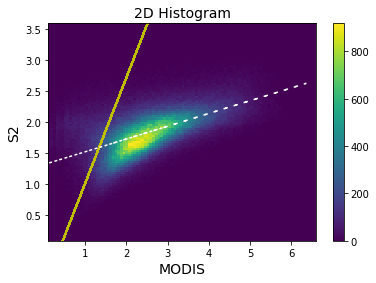

In [3]:
calStas2('LAI','MODIS', "D:\\vegetation\\gee\\LAI", 'boreal', 0.1, 0.9) 

The number of csv files: 35
Sample points for plotting: 50000
Theil-Sen estimator: (1.9536433057130154, -1.0274040777264313, 1.9279206888758003, 1.979320576578808)


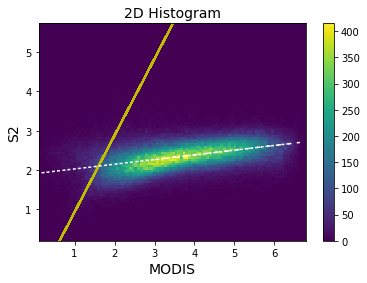

In [4]:
calStas2('LAI','MODIS', "D:\\vegetation\\gee\\LAI", 'tropical', 0.1, 0.9) 

The number of csv files: 35
Sample points for plotting: 50000
Theil-Sen estimator: (1.4134616876928725, -0.008624344184699151, 1.3973106876647483, 1.429549393281933)


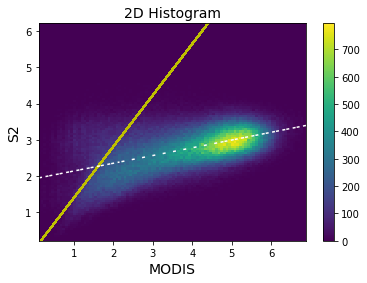

In [5]:
calStas2('LAI','MODIS', "D:\\vegetation\\gee\\LAI", 'temperate', 0.1, 0.9) 

The number of csv files: 35
Sample points for plotting: 50000
Theil-Sen estimator: (2.26784461906767, -1.4941453235028077, 2.257323337704983, 2.2783640431347667)


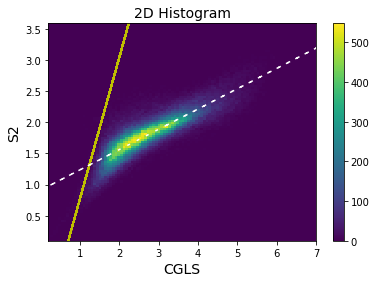

In [6]:
calStas2('LAI','CGLS', "D:\\vegetation\\gee\\LAI", 'boreal', 0.1, 0.9) 

The number of csv files: 35
Sample points for plotting: 50000
Theil-Sen estimator: (2.2060429233833583, -1.127130692548615, 2.1945388887597916, 2.217543635775427)


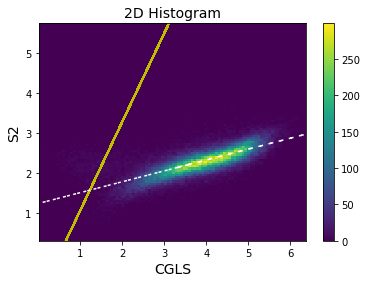

In [7]:
calStas2('LAI','CGLS', "D:\\vegetation\\gee\\LAI", 'tropical', 0.1, 0.9) 

The number of csv files: 35
Sample points for plotting: 50000
Theil-Sen estimator: (1.6361245406818008, 0.5860064968725514, 1.6255137489127685, 1.6466974056042067)


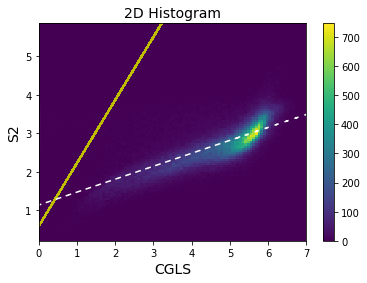

In [8]:
calStas2('LAI','CGLS', "D:\\vegetation\\gee\\LAI", 'temperate', 0.1, 0.9)

in FAPAR MODIS
The number of csv files: 35
Sample points for plotting: 50000
Theil-Sen estimator: (0.8378716082151305, 0.33134106961062665, 0.8284940599802899, 0.8472453139369917)


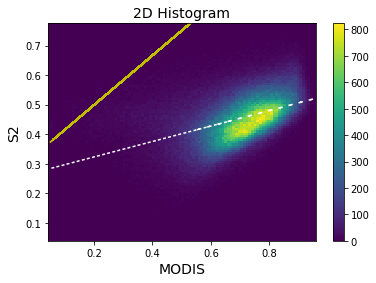

In [9]:
calStas2('FAPAR','MODIS', "D:\\vegetation\\gee\\FAPAR", 'boreal', 0.1, 0.9) 

in FAPAR MODIS
The number of csv files: 35
Sample points for plotting: 50000
Theil-Sen estimator: (0.5257487674219113, 0.453415970460614, 0.5180271724792864, 0.5334590079341123)


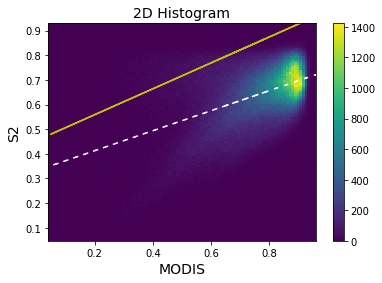

In [10]:
calStas2('FAPAR','MODIS', "D:\\vegetation\\gee\\FAPAR", 'temperate', 0.1, 0.9) 

in FAPAR MODIS
The number of csv files: 35
Sample points for plotting: 50000
Theil-Sen estimator: (0.6343820759870926, 0.3785683040581713, 0.6215545261491782, 0.6471878212319384)


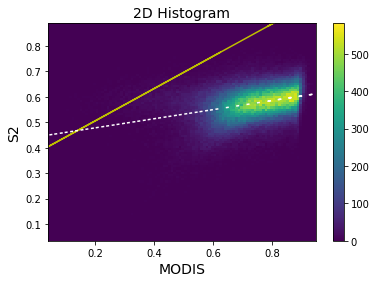

In [11]:
calStas2('FAPAR','MODIS', "D:\\vegetation\\gee\\FAPAR", 'tropical', 0.1, 0.9) 

In [ ]:
calStas2('FAPAR','CGLS', "D:\\vegetation\\gee\\FAPAR", 'boreal', 0.1, 0.9)

in FAPAR CGLS
The number of csv files: 35
Sample points for plotting: 100000


in FAPAR CGLS
The number of csv files: 35
Sample points for plotting: 50000
Theil-Sen estimator: (0.7757858177948808, 0.3222793207279917, 0.7713746698000078, 0.7801944466237871)


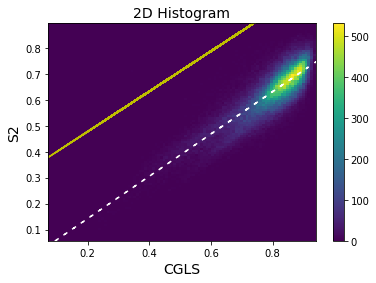

In [13]:
calStas2('FAPAR','CGLS', "D:\\vegetation\\gee\\FAPAR", 'temperate', 0.1, 0.9) 

in FAPAR CGLS
The number of csv files: 35
Sample points for plotting: 50000
Theil-Sen estimator: (0.8853822177833225, 0.2475760386224104, 0.8793817837354858, 0.8913807392537809)


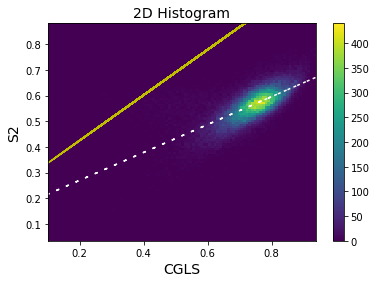

In [14]:
calStas2('FAPAR','CGLS', "D:\\vegetation\\gee\\FAPAR", 'tropical', 0.1, 0.9) 

in FCOVER CGLS
The number of csv files: 35
Sample points for plotting: 50000
Theil-Sen estimator: (1.2705212950935083, 0.029323951606619603, 1.2660081936637262, 1.2750362240799509)


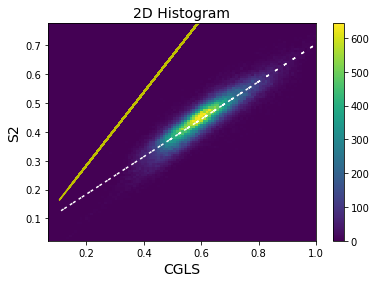

In [7]:
calStas2('FCOVER','CGLS', "D:\\vegetation\\gee\\FCOVER", 'boreal', 0.1, 0.9) 

in FCOVER CGLS
The number of csv files: 35
Sample points for plotting: 50000
Theil-Sen estimator: (0.7909288631696284, 0.3637576693340725, 0.7863799631288927, 0.7954701848091534)


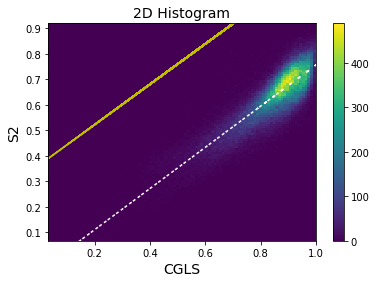

In [5]:
calStas2('FCOVER','CGLS', "D:\\vegetation\\gee\\FCOVER", 'temperate', 0.1, 0.9) 

in FCOVER CGLS
The number of csv files: 35
Sample points for plotting: 50000
Theil-Sen estimator: (0.8913832505969207, 0.2860860217010759, 0.884241706566801, 0.8985303281938609)


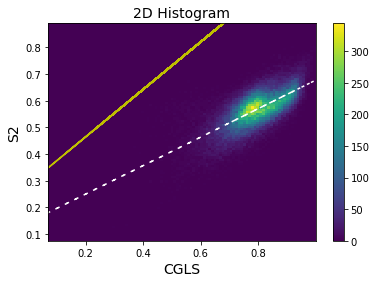

In [6]:
calStas2('FCOVER','CGLS', "D:\\vegetation\\gee\\FCOVER", 'tropical', 0.1, 0.9) 

The number of csv files: 28
Sample points for plotting: 50000
Theil-Sen estimator: (1.514589064833507, -0.5841525037270032, 1.5013485093064582, 1.5278285183452673)


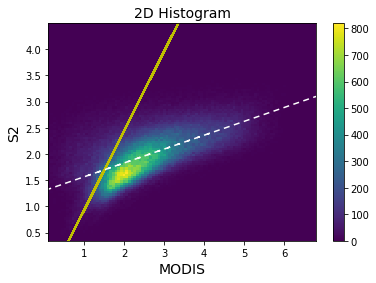

In [31]:
calStas2('LAI','MODIS', "D:\\vegetation\\gee\\LAI_CCRS", 'boreal', 0.1, 0.9) 

In [ ]:
calStas2('LAI','MODIS', "D:\\vegetation\\gee\\LAI_CCRS", 'temperate', 0.1, 0.9) 

The number of csv files: 28
Sample points for plotting: 50000


In [ ]:
calStas2('LAI','MODIS', "D:\\vegetation\\gee\\LAI_CCRS", 'tropical', 0.1, 0.9) 

In [ ]:
calStas2('LAI','CGLS', "D:\\vegetation\\gee\\LAI_CCRS", 'boreal', 0.1, 0.9) 

In [ ]:
calStas2('LAI','CGLS', "D:\\vegetation\\gee\\LAI_CCRS", 'temperate', 0.1, 0.9) 

In [ ]:
calStas2('LAI','CGLS', "D:\\vegetation\\gee\\LAI_CCRS", 'tropical', 0.1, 0.9) 

In [ ]:
calStas2('FAPAR','MODIS', "D:\\vegetation\\gee\\FAPAR_CCRS", 'temperate', 0.1, 0.9) 

In [ ]:
calStas2('FAPAR','MODIS', "D:\\vegetation\\gee\\FAPAR_CCRS", 'boreal', 0.1, 0.9) 

In [ ]:
calStas2('FAPAR','MODIS', "D:\\vegetation\\gee\\FAPAR_CCRS", 'tropical', 0.1, 0.9) 

In [ ]:
calStas2('FAPAR','CGLS', "D:\\vegetation\\gee\\FAPAR_CCRS", 'temperate', 0.1, 0.9) 

In [ ]:
calStas2('FAPAR','CGLS', "D:\\vegetation\\gee\\FAPAR_CCRS", 'boreal', 0.1, 0.9) 

In [ ]:
calStas2('FAPAR','CGLS', "D:\\vegetation\\gee\\FAPAR_CCRS", 'tropical', 0.1, 0.9) 

in FCOVER CGLS
The number of csv files: 22
Sample points for plotting: 50000
Theil-Sen estimator: (1.211436916049871, 0.05893017705441683, 1.207046682394488, 1.2158274501470479)


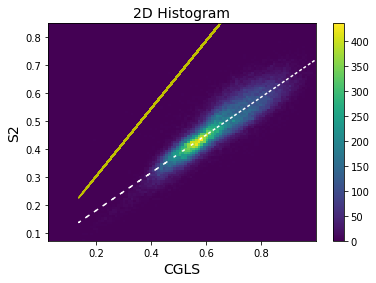

In [30]:
calStas2('FCOVER','CGLS', "D:\\vegetation\\gee\\FCOVER_CCRS", 'boreal', 0.1, 0.9) 

in FCOVER CGLS
The number of csv files: 22
Sample points for plotting: 50000
Theil-Sen estimator: (0.7184622273202985, 0.42529542299631073, 0.7138004848681284, 0.723119511477707)


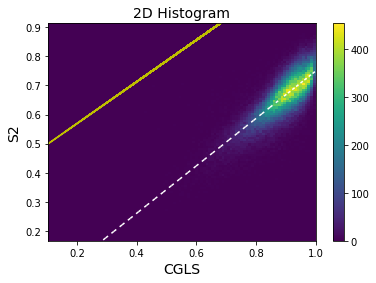

In [28]:
calStas2('FCOVER','CGLS', "D:\\vegetation\\gee\\FCOVER_CCRS", 'temperate', 0.1, 0.9) 

in FCOVER CGLS
The number of csv files: 22
Sample points for plotting: 50000
Theil-Sen estimator: (0.9139658096149742, 0.28935695106860515, 0.9068097352374678, 0.9211200201231983)


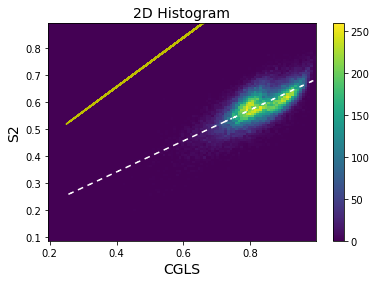

In [29]:
calStas2('FCOVER','CGLS', "D:\\vegetation\\gee\\FCOVER_CCRS", 'tropical', 0.1, 0.9) 

In [ ]:
count=0
parameter="MODIS.csv"
i=0
df_list=[]
for filename in os.listdir("D:\\vegetation\\gee\\notebook"):
   if filename.find(parameter)!=-1: 
       print(filename)       
       df=pd.read_csv (filename, index_col=0)
#        i=i+1
       df_list.append(df)
print("total count:",i)
len(df_list)
# df_list[2].head(100)

In [ ]:
lc = [1.0,2.0]
mask=df_list[0]['S2MODIS_LC'].isin(lc) & (df_list[0]['S2MODIS_EZ']==41.0)
newdf=df_list[0].loc[mask]
newdf.tail(1000)
# len(newdf)


In [ ]:
nnewdf=newdf.loc[newdf['S2MODIS_LC']==6]
nnewdf.tail(1000)

In [ ]:
newdf_list=[]
lc = [1.0, 2.0]
for i in range (0, len(df_list)):    
    mask=df_list[i]['S2MODIS_LC'].isin(lc) & (df_list[i]['S2MODIS_EZ']==41.0) & (df_list[i]['S2MODIS_LAICOUNT'] == 5625)
    tempdf=df_list[i].loc[mask]
    newdf_list.append(tempdf)
# len(newdf_list)

#len(newdf_list[2])
#frames = [newdf_list[0], newdf_list[1], newdf_list[2]]
# newdff=pd.concat(frames)
newdf=pd.concat(newdf_list)
len(newdf)

In [ ]:
newdf['S2LAI']=newdf['S2MODIS_LAI']/1000
newdf['MODISLAI']=newdf['MODIS_LAI']/10

In [ ]:
from scipy import stats
res=stats.theilslopes(newdf['MODISLAI'],newdf['S2LAI'],0.90 )
lsq_res=stats.linregress(newdf['MODISLAI'],newdf['S2LAI'])

In [ ]:
x=newdf['MODISLAI'].to_numpy()
y=newdf['S2LAI'].to_numpy()

In [ ]:
plt.hist2d(x,y, bins=100)
#plt.plot([0,6],[0,6],'--',linewidth=2, color='White')
plt.title('LAI historam dentity')
plt.plot(x, res[1]+res[0]*x,'w--')
plt.plot(x, lsq_res[1]+lsq_res[0]*x,'y--')
plt.xlabel('MODIS_LAI')
plt.ylabel('S2_LAI')
plt.show()

In [ ]:
df['S2LAI']=df['S2MODIS_LAI']/1000
df['MODISLAI']=df['MODIS_LAI']/10
print (df.head(100))

In [ ]:
newdf = df.loc[df['S2MODIS_LAICOUNT'] == 5625]
#print (newdf.head(100))
len(newdf)
newdf2=newdf.tail(1000)

In [ ]:
ax1 = newdf2.plot.scatter(x='S2LAI',
                      y='MODISLAI',
                      c='DarkBlue')

In [ ]:
import matplotlib.pyplot as plt

# a scatter plot comparing num_children and num_pets
newdf2.plot(kind='scatter',x='S2LAI',y='MODISLAI',color='DarkBlue')
plt.show()

In [ ]:
plt.hist2d(newdf['S2LAI'], newdf['MODISLAI'], bins=100)
plt.plot([0,6],[0,6],'--',linewidth=2, color='White')
plt.title('LAI historam dentity')
plt.xlabel('S2LAI')
plt.ylabel('MODISLAI')
plt.show()

In [ ]:
df.describe()

In [ ]:
rmse=((newdf.S2_LAI_updated - newdf.MODIS_LAI_updated) ** 2).mean() ** .5

In [ ]:
df["date"] = pd.to_datetime(df["S2MODIS_DATE"])
df.head(100)

In [ ]:
mask = (df['date'] >= '2019-06-01') & (df['date'] <= '2019-06-05')
print(df.loc[mask])